# Electric Vehicle Analysis

## Import necessary libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
car = pd.read_csv('file.csv')

In [18]:
car.head()

,Make,Model,Type,City,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Metro City,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Metro City,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Metro City,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Metro City,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Metro City,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [19]:
car.shape

(432, 15)

In [20]:
car.isnull().sum()

Make           4
Model          4
Type           4
City           4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

In [21]:
# fill nulls..

def fill_na(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna('Unknown', inplace=True)
        else:
            df[col].fillna(0, inplace=True)

fill_na(car)


In [22]:
#checking the result 
car.isnull().sum()

Make           0
Model          0
Type           0
City           0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [23]:
car

,Make,Model,Type,City,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Metro City,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Metro City,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Metro City,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Metro City,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Metro City,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Developing Area,Front,"$40,565","$38,203",2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Developing Area,Front,"$42,565","$40,083",2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Developing Area,Front,"$45,210","$42,573",2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Developing Area,Front,"$26,135","$24,641",1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


In [24]:
car['Make'].value_counts()

Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Nissan           17
Honda            17
Chrysler         15
Volkswagen       15
Mitsubishi       13
Dodge            13
Hyundai          12
Jaguar           12
Volvo            12
Kia              11
Mazda            11
Lexus            11
Pontiac          11
Subaru           11
Lincoln           9
Mercury           9
Buick             9
Saturn            8
Infiniti          8
GMC               8
Cadillac          8
Suzuki            8
Porsche           7
Saab              7
Acura             7
Unknown           4
Oldsmobile        3
Jeep              3
Land Rover        3
MINI              2
Scion             2
Isuzu             2
Hummer            1
Name: Make, dtype: int64

## In which cities cars sold the most ? 

In [25]:
#Grouped the type of cities cars sold in ...
grouped = car.groupby(['City']).sum()
print(grouped)

                 EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
City                                                                        
Developing Area       394.4      767.0     30983.0    2304.0       3199.0   
Metro City            438.3      809.0     30131.0    3478.0       4466.0   
Unknown                 0.0        0.0         0.0       0.0          0.0   
Urban                 535.5      898.0     31285.0    2804.0       3824.0   

                   Weight  Wheelbase   Length  
City                                           
Developing Area  452729.0    13093.0  22367.0  
Metro City       524452.0    16730.0  28885.0  
Unknown               0.0        0.0      0.0  
Urban            554183.0    16467.0  28511.0  


C:\Users\HP\AppData\Local\Temp\ipykernel_4360\116142542.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = car.groupby(['City']).sum()


### We get 3 types of cities

In [26]:
car[car['City'].isin(['Urban'])]

,Make,Model,Type,City,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
48,Buick,Rainier,SUV,Urban,All,"$37,895","$34,357",4.2,6.0,275.0,15.0,21.0,4600.0,113.0,193.0
49,Buick,Rendezvous CX,SUV,Urban,Front,"$26,545","$24,085",3.4,6.0,185.0,19.0,26.0,4024.0,112.0,187.0
50,Buick,Century Custom 4dr,Sedan,Urban,Front,"$22,180","$20,351",3.1,6.0,175.0,20.0,30.0,3353.0,109.0,195.0
51,Buick,LeSabre Custom 4dr,Sedan,Urban,Front,"$26,470","$24,282",3.8,6.0,205.0,20.0,29.0,3567.0,112.0,200.0
52,Buick,Regal LS 4dr,Sedan,Urban,Front,"$24,895","$22,835",3.8,6.0,200.0,20.0,30.0,3461.0,109.0,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,Saturn,lon3 4dr,Sedan,Urban,Front,"$15,825","$14,811",2.2,4.0,140.0,26.0,35.0,2692.0,103.0,185.0
352,Saturn,lon2 quad coupe 2dr,Sedan,Urban,Front,"$14,850","$13,904",2.2,4.0,140.0,26.0,35.0,2751.0,103.0,185.0
353,Saturn,lon3 quad coupe 2dr,Sedan,Urban,Front,"$16,350","$15,299",2.2,4.0,140.0,26.0,35.0,2751.0,103.0,185.0
354,Saturn,L300-2 4dr,Sedan,Urban,Front,"$21,410","$19,801",3.0,6.0,182.0,20.0,28.0,3197.0,107.0,190.0


In [27]:
car[car['City'].isin(['Metro City'])]

,Make,Model,Type,City,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Metro City,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Metro City,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Metro City,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Metro City,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Metro City,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,Toyota,MR2 Spyder convertible 2dr,Sports,Metro City,Rear,"$25,130","$22,787",1.8,4.0,138.0,26.0,32.0,2195.0,97.0,153.0
401,Toyota,Tacoma,Truck,Metro City,Rear,"$12,800","$11,879",2.4,4.0,142.0,22.0,27.0,2750.0,103.0,191.0
402,Toyota,Tundra Regular Cab V6,Truck,Metro City,Rear,"$16,495","$14,978",3.4,6.0,190.0,16.0,18.0,3925.0,128.0,218.0
403,Toyota,Tundra Access Cab V6 SR5,Truck,Metro City,All,"$25,935","$23,520",3.4,6.0,190.0,14.0,17.0,4435.0,128.0,218.0


In [28]:
car[car['City'].isin(['Developing Area'])]

,Make,Model,Type,City,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
7,Audi,A4 1.8T 4dr,Sedan,Developing Area,Front,"$25,940","$23,508",1.8,4.0,170.0,22.0,31.0,3252.0,104.0,179.0
8,Audi,A41.8T convertible 2dr,Sedan,Developing Area,Front,"$35,940","$32,506",1.8,4.0,170.0,23.0,30.0,3638.0,105.0,180.0
9,Audi,A4 3.0 4dr,Sedan,Developing Area,Front,"$31,840","$28,846",3.0,6.0,220.0,20.0,28.0,3462.0,104.0,179.0
10,Audi,A4 3.0 Quattro 4dr manual,Sedan,Developing Area,All,"$33,430","$30,366",3.0,6.0,220.0,17.0,26.0,3583.0,104.0,179.0
11,Audi,A4 3.0 Quattro 4dr auto,Sedan,Developing Area,All,"$34,480","$31,388",3.0,6.0,220.0,18.0,25.0,3627.0,104.0,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Developing Area,Front,"$40,565","$38,203",2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Developing Area,Front,"$42,565","$40,083",2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Developing Area,Front,"$45,210","$42,573",2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Developing Area,Front,"$26,135","$24,641",1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


In [29]:
# We get that companies sale cars in metropolitan cities cities the most 
#Analysis: Such cities have better transportation and most importantly most of the charging stations and customer support is better

In [30]:
# In such senario, we should target non-metro cities, by setting up most of our charging-sation and customer support here

### Finding the discount on MRP 

In [33]:
# converting necessary values into float
car['MSRP'] = pd.to_numeric(car['MSRP'].replace('[\$,]', '', regex=True), errors='coerce')
car['Invoice'] = pd.to_numeric(car['Invoice'].replace('[\$,]', '', regex=True), errors='coerce')

# Finding the discount in percentage
car['Discount'] = car['MSRP'] - car['Invoice']
car['Discount_percentage'] = (car['Discount'] / car['MSRP']) * 100

#Average discount in percentage
average_discount_percentage = car['Discount_percentage'].mean()

# Display the result
print(f"Average discount percentage: {average_discount_percentage:.2f}%")

Average discount percentage: 8.06%


In [35]:
# This is the average discount we have to match according to the market [8.06%]

## Which Drive Train People prefer the most ?

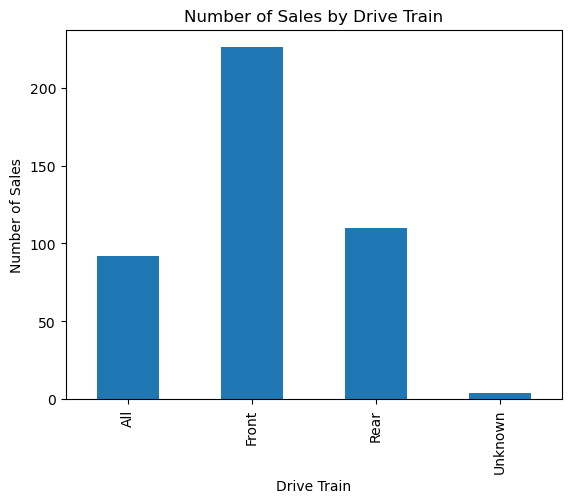

In [36]:
sales_by_drive_train = car.groupby('DriveTrain').size()

# Plot the result
sales_by_drive_train.plot(kind='bar')
plt.title('Number of Sales by Drive Train')
plt.xlabel('Drive Train')
plt.ylabel('Number of Sales')
plt.show()

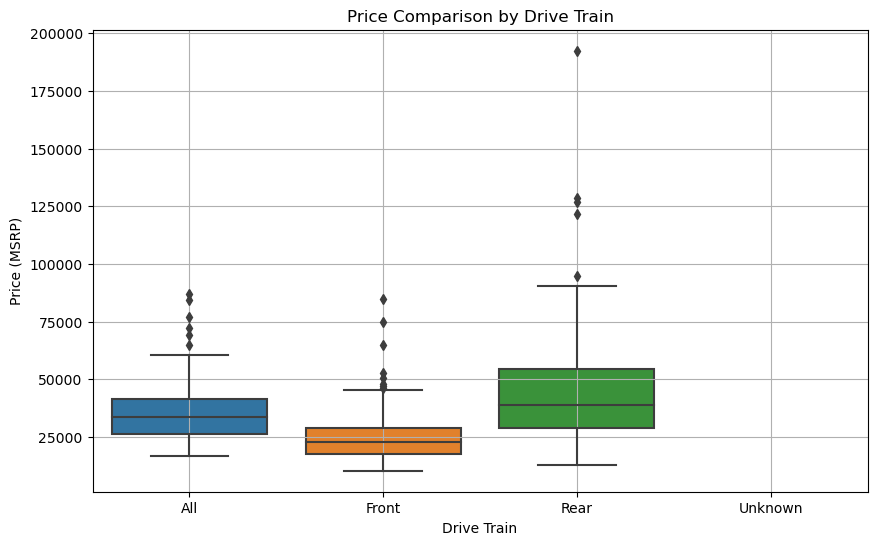

In [47]:
car['Sales'] = 1

# Create a box plot to compare prices by drive train
plt.figure(figsize=(10, 6))
sns.boxplot(x='DriveTrain', y='MSRP', data=car)
plt.title('Price Comparison by Drive Train')
plt.xlabel('Drive Train')
plt.ylabel('Price (MSRP)')
plt.grid(True)
plt.show()

### From the above graph we can conclude that people prefer front drive train as they cost less

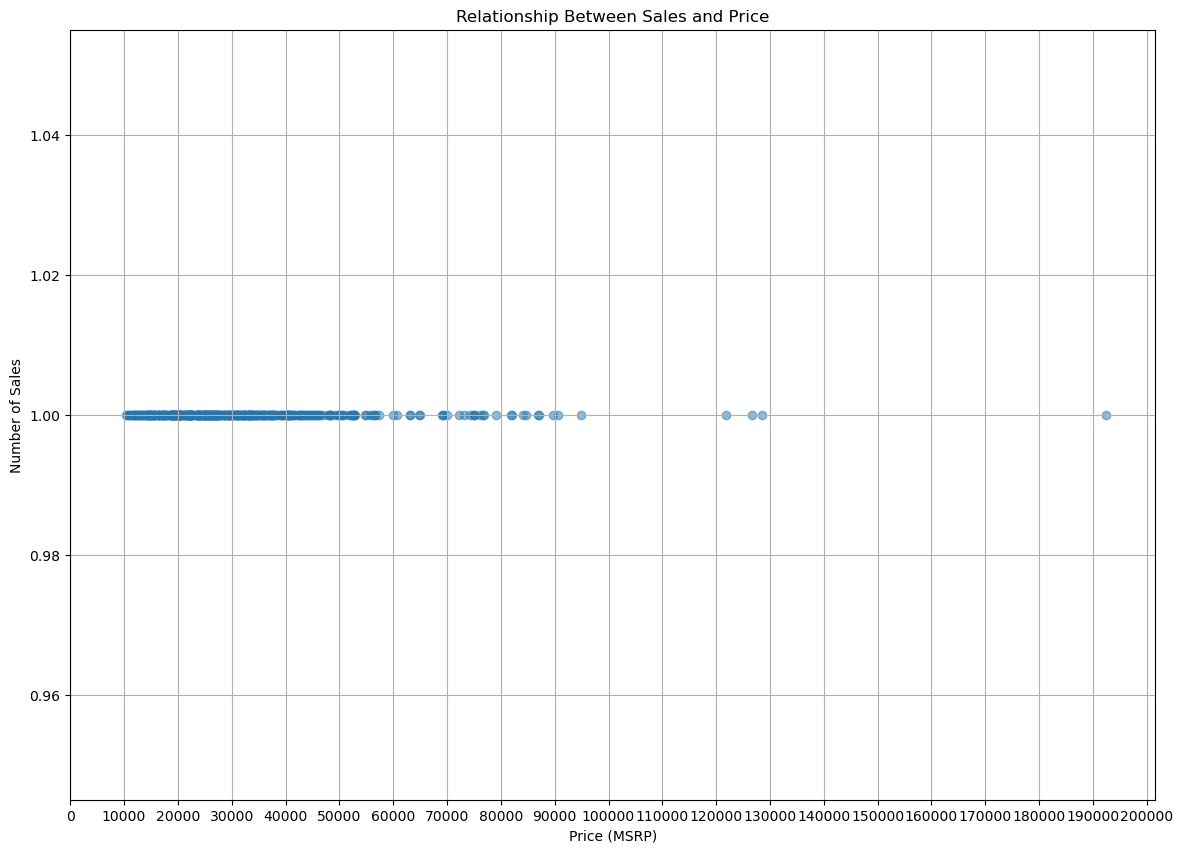

In [43]:
car['Sales'] = 1  # Assuming each row as a single sale

# Plotting relationship between Sales and Price
plt.figure(figsize=(14,10))
plt.scatter(car['MSRP'], car['Sales'], alpha=0.5)
plt.title('Relationship Between Sales and Price')
plt.xlabel('Price (MSRP)')
plt.ylabel('Number of Sales')
plt.grid(True)

# Setting x-axis ticks to intervals of 10,000
plt.xticks(range(0, int(car['MSRP'].max()) + 10000, 10000))

plt.show()

### Maximum cars sold are between the range of (10000- 50000)$

## Conclusion:  

#### (10,000-50,000)$ is the price range we should target with the possibility of giving 8-9% discount to the buyer

#### We should target non-metro cities with better services 

#### Rear drive train is prefered more by people because they cost less